# Проект по базовому SQL

Данный самостоятельный проект посвящён базовому SQL, в нём нужно было проанализировать данные о фондах и инвестициях и написать запросы к базе. 

**Схема и описание базы данных**:

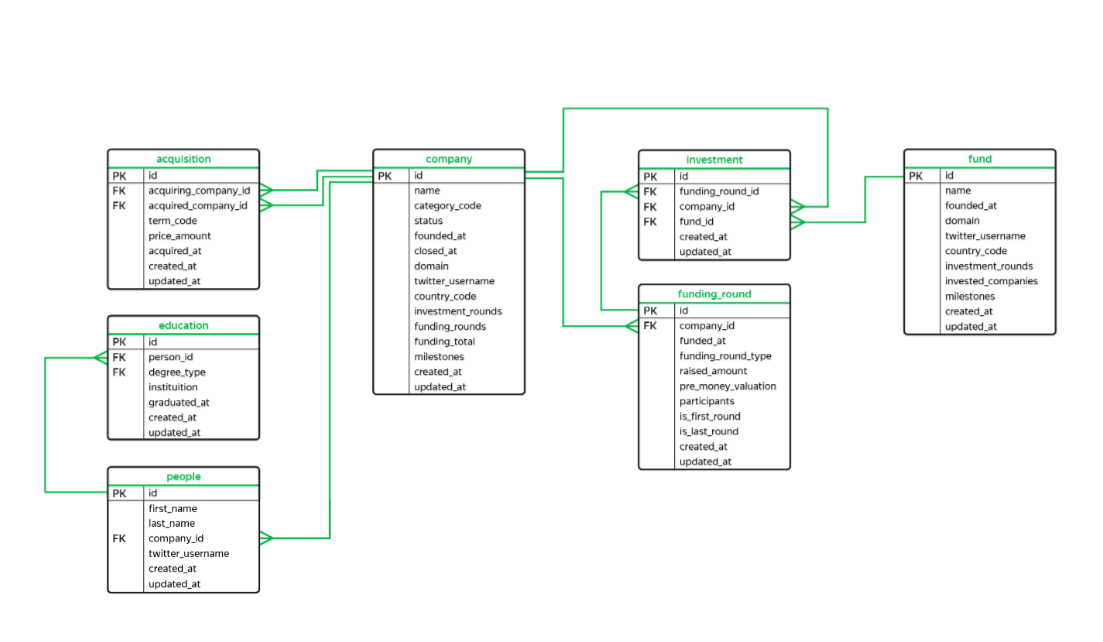

`acquisition`

Содержит информацию о покупках одних компаний другими.  
Таблица включает такие поля:


* первичный ключ `id` — идентификатор или уникальный номер покупки;
* внешний ключ `acquiring_company_id` — ссылается на таблицу `company` — идентификатор компании-покупателя, то есть той, что покупает другую компанию;
* внешний ключ `acquired_company_id` — ссылается на таблицу `company` — идентификатор компании, которую покупают;
* `term_code` — способ оплаты сделки:
   * `cash` — наличными;
   * `stock` — акциями компании;
   * `cash_and_stock` — смешанный тип оплаты: наличные и акции.
* `price_amount` — сумма покупки в долларах;
* `acquired_at` — дата совершения сделки;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

---
`company`  


Содержит информацию о компаниях-стартапах. 


* первичный ключ `id` — идентификатор, или уникальный номер компании;
* `name` — название компании;
* `category_code` — категория деятельности компании, например:
   * `news` — специализируется на работе с новостями;
   * `social` — специализируется на социальной работе.
* `status` — статус компании:
   * `acquired` — приобретена;
   * `operating` — действует;
   *`ipo` — вышла на IPO;
   * `closed` — перестала существовать.
* `founded_at` — дата основания компании;
* `closed_at` — дата закрытия компании, которую указывают в том случае, если компании больше не существует;
* `domain` — домен сайта компании;
* `twitter_username` — название профиля компании в твиттере;
* `country_code` — код страны, например, USA для США, GBR для Великобритании;
* `investment_rounds` — число раундов, в которых компания участвовала как инвестор;
* `funding_rounds` — число раундов, в которых компания привлекала инвестиции;
* `funding_total` — сумма привлечённых инвестиций в долларах;
* `milestones` — количество важных этапов в истории компании;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

___

`education`


Хранит информацию об уровне образования сотрудников компаний.  


* первичный ключ `id` — уникальный номер записи с информацией об образовании;
* внешний ключ `person_id` — ссылается на таблицу people — идентификатор человека, информация о котором представлена в записи;
* `degree_type` — учебная степень, например:
   * `BA — Bachelor of Arts` — бакалавр гуманитарных наук;
   * `MS — Master of Science` — магистр естественных наук.
* `instituition` — учебное заведение, название университета;
* `graduated_at` — дата завершения обучения, выпуска;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

___

`fund`

Хранит информацию о венчурных фондах.


* первичный ключ `id` — уникальный номер венчурного фонда;
* `name` — название венчурного фонда;
* `founded_at` — дата основания фонда;
* `domain` — домен сайта фонда;
* `twitter_username` — профиль фонда в твиттере;
* `country_code` — код страны фонда;
* `investment_rounds` — число инвестиционных раундов, в которых фонд принимал участие;
* `invested_companies` — число компаний, в которые инвестировал фонд;
* `milestones` — количество важных этапов в истории фонда;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

---

`funding_round`

Содержит информацию о раундах инвестиций.

* первичный ключ `id` — уникальный номер инвестиционного раунда;
* внешний ключ `company_id` — ссылается на таблицу `company` — уникальный номер компании, участвовавшей в инвестиционном раунде;
* `funded_at` — дата проведения раунда;
* `funding_round_type` — тип инвестиционного раунда, например:
   * `venture` — венчурный раунд;
   * `angel` — ангельский раунд;
   * `series_a` — раунд А.
* `raised_amount` — сумма инвестиций, которую привлекла компания в этом раунде в долларах;
* `pre_money_valuation` — предварительная, проведённая до инвестиций оценка стоимости компании в долларах;
* `participants` — количество участников инвестиционного раунда;
* `is_first_round` — является ли этот раунд первым для компании;
* `is_last_round` — является ли этот раунд последним для компании;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

---

`investment`

Содержит информацию об инвестициях венчурных фондов в компании-стартапы.

* первичный ключ `id` — уникальный номер инвестиции;
* внешний ключ `funding_round_id` — ссылается на таблицу `funding_round` — уникальный номер раунда инвестиции;
* внешний ключ `company_id` — ссылается на таблицу `company` — уникальный номер компании-стартапа, в которую инвестируют;
* внешний ключ `fund_id` — ссылается на таблицу `fund` — уникальный номер фонда, инвестирующего в компанию-стартап;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

---

`people`

Содержит информацию о сотрудниках компаний-стартапов.

* первичный ключ `id` — уникальный номер сотрудника;
* `first_name` — имя сотрудника;
* `last_name` — фамилия сотрудника;
внешний ключ `company_id` — ссылается на таблицу `company` — уникальный номер компании-стартапа;
* `twitter_username` — профиль сотрудника в твиттере;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

# 1.
Посчитайте, сколько компаний закрылось.

```SQL
SELECT COUNT(name)
FROM company
WHERE status = 'closed'
```

# 2.
Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы `company`. Отсортируйте таблицу по убыванию значений в поле `funding_total` .

```SQL
SELECT funding_total 
FROM company
WHERE category_code = 'news'
AND country_code = 'USA'
ORDER BY funding_total DESC
```

# 3.
Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

```SQL
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'
AND EXTRACT(YEAR FROM acquired_at) IN (2011,2012,2013) 
```

# 4.

Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на `'Silver'`.

```SQL
SELECT first_name,
last_name,
twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%'
```

# 5.

Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку `'money'`, а фамилия начинается на `'K'`.

```SQL
SELECT *
FROM people
WHERE twitter_username LIKE '%money%'
AND last_name LIKE 'K%'
```

# 6.

Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

```SQL
SELECT country_code,
SUM(funding_total)
FROM company
GROUP BY country_code
ORDER BY SUM(funding_total) DESC
```

# 7.

Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

```SQL
SELECT funded_at,
MIN(raised_amount),
MAX(raised_amount)
FROM funding_round
GROUP BY funded_at
HAVING MIN(raised_amount) > 0 
AND MIN(raised_amount) < MAX(raised_amount)
```

# 8.

Создайте поле с категориями:
Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию `high_activity`.
Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию `middle_activity`.
Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию `low_activity`.
Отобразите все поля таблицы `fund` и новое поле с категориями.

```SQL
SELECT *,
 CASE
           WHEN invested_companies > 100 THEN 'high_activity'
           WHEN invested_companies <20 THEN 'low_activity'
           ELSE 'middle_activity'
       END
FROM fund
```

# 9.

Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

```SQL
SELECT ROUND(AVG(investment_rounds)),
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity
FROM fund
GROUP BY activity
ORDER BY round;
```

# 10.


Выгрузите таблицу с десятью самыми активными инвестирующими странами. Активность страны определите по среднему количеству компаний, в которые инвестируют фонды этой страны.
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды, основанные с 2010 по 2012 год включительно.
Исключите из таблицы страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Отсортируйте таблицу по среднему количеству компаний от большего к меньшему, а затем по коду страны в лексикографическом порядке.
Для фильтрации диапазона по годам используйте оператор `BETWEEN`.

```SQL
SELECT country_code,
MIN(invested_companies),
MAX(invested_companies),
AVG(invested_companies)
FROM fund
WHERE EXTRACT(YEAR FROM founded_at) BETWEEN 2010 AND 2012
GROUP BY country_code
HAVING MIN(invested_companies) > 0
ORDER BY AVG(invested_companies) DESC
LIMIT 10
```

# 11.


Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

```SQL
SELECT p.first_name,
p.last_name,
e.instituition 
FROM people AS p
LEFT OUTER JOIN education AS e on p.id=e.person_id

```

# 12.

Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

```SQL
SELECT c.name,
COUNT(DISTINCT(e.instituition))
FROM company AS c
JOIN people AS p ON c.id = p.company_id
JOIN education AS e ON p.id = e.person_id
GROUP BY c.name
ORDER BY COUNT(DISTINCT(e.instituition)) DESC
LIMIT 5

```

# 13.

Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

```SQL
SELECT DISTINCT(c.name)
FROM company AS c
JOIN funding_round as f_r ON c.id = f_r.company_id
WHERE status = 'closed'
AND is_first_round = 1
AND is_last_round  = 1

```

# 14.

Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

```SQL
SELECT DISTINCT(p.id)
FROM people AS p 
JOIN (SELECT DISTINCT(c.id)
FROM company AS c
JOIN funding_round as f_r ON c.id = f_r.company_id
WHERE status = 'closed'
AND is_first_round = 1
AND is_last_round  = 1) AS i ON p.company_id = i.id 

```

# 15.


Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

```SQL
SELECT DISTINCT b.*, 
e.instituition
FROM education AS e
JOIN (SELECT DISTINCT(p.id)
FROM people AS p 
JOIN (SELECT DISTINCT(c.id)
FROM company AS c
JOIN funding_round as f_r ON c.id = f_r.company_id
WHERE status = 'closed'
AND is_first_round = 1
AND is_last_round  = 1) AS i ON p.company_id = i.id) AS b ON e.person_id = b.id

```

# 16.

Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания.

```SQL
SELECT b.*, 
COUNT(e.instituition)
FROM education AS e
JOIN (SELECT DISTINCT(p.id)
FROM people AS p 
JOIN (SELECT DISTINCT(c.id)
FROM company AS c
JOIN funding_round as f_r ON c.id = f_r.company_id
WHERE status = 'closed'
AND is_first_round = 1
AND is_last_round  = 1) AS i ON p.company_id = i.id) AS b ON e.person_id = b.id
GROUP BY b.id
```

# 17.

Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

```SQL
SELECT AVG(total)
FROM (SELECT b.*, 
COUNT(e.instituition) AS total
FROM education AS e
JOIN (SELECT DISTINCT(p.id)
FROM people AS p 
JOIN (SELECT DISTINCT(c.id)
FROM company AS c
JOIN funding_round as f_r ON c.id = f_r.company_id
WHERE status = 'closed'
AND is_first_round = 1
AND is_last_round  = 1) AS i ON p.company_id = i.id) AS b ON e.person_id = b.id
GROUP BY b.id) AS x
```

# 18.

Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*.
*(сервис, запрещённый на территории РФ)

```SQL
SELECT AVG(z.total)
FROM (SELECT i.id, 
COUNT(e.instituition) AS total
FROM
(SELECT id
FROM people
WHERE company_id = 5) AS i JOIN education AS e ON i.id = e.person_id
GROUP BY i.id) AS z
```

# 19.

Составьте таблицу из полей:
`name_of_fund` — название фонда;
`name_of_company` — название компании;
`amount` — сумма инвестиций, которую привлекла компания в раунде.
В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

```SQL
SELECT f.name AS name_of_fund,
c.name AS name_of_company,
f_r.raised_amount AS amount
FROM investment AS i
LEFT JOIN company AS c ON i.company_id = c.id
LEFT JOIN fund AS f ON i.fund_id = f.id
LEFT JOIN funding_round AS f_r ON i.funding_round_id = f_r.id
WHERE c.milestones > 6
AND CAST(f_r.funded_at AS date) BETWEEN '2012-01-01' AND '2013-12-31'
```

# 20.

Выгрузите таблицу, в которой будут такие поля:

* название компании-покупателя;
* сумма сделки;
* название компании, которую купили;
* сумма инвестиций, вложенных в купленную компанию;
* доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.

Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

```SQL
SELECT a.acquiring_company_id,
c.name, 
a.acquired_company_id,
c.name
FROM acquisition AS a
LEFT JOIN company as c ON a.acquiring_company_id = c.id
GROUP BY a.acquiring_company_id,
c.name,
a.acquired_company_id
```

# 21.

Выгрузите таблицу, в которую войдут названия компаний из категории `social`, получившие финансирование с 2010 по 2013 год включительно. Выведите также номер месяца, в котором проходил раунд финансирования.

```SQL
SELECT c.name,
EXTRACT(MONTH FROM funded_at)
FROM company AS c
LEFT JOIN funding_round AS fr ON c.id = fr.company_id
WHERE category_code = 'social'
AND funded_at BETWEEN '2010-01-01' AND '2013-12-31'
```

# 22.

Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:

* номер месяца, в котором проходили раунды;
* количество уникальных названий фондов из США, которые инвестировали в этом месяце;
* количество компаний, купленных за этот месяц;
* общая сумма сделок по покупкам в этом месяце.

```SQL
WITH 

a AS (
SELECT EXTRACT(MONTH FROM funded_at) AS month,
COUNT(distinct(fund.name)) AS count_fund
FROM fund 
JOIN investment ON fund.id = investment.fund_id
JOIN funding_round ON investment.funding_round_id = funding_round.id
WHERE funding_round.funded_at BETWEEN '2010-01-01' AND '2013-12-31'
AND fund.country_code = 'USA'
GROUP BY EXTRACT(MONTH FROM funded_at)),

b AS (SELECT EXTRACT(MONTH FROM acquired_at)AS month,
     COUNT(acquired_company_id) AS company,
     SUM(price_amount) AS total
FROM acquisition
WHERE acquired_at BETWEEN '2010-01-01' AND '2013-12-31'
GROUP BY EXTRACT(MONTH FROM acquired_at))

SELECT a.month,
count_fund,
company,
total
FROM a JOIN b on a.month = b.month
```

# 23.

Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

```SQL
WITH 

a AS (SELECT country_code,
AVG(funding_total) AS avg2011
FROM company
WHERE EXTRACT(YEAR FROM founded_at) = '2011'
GROuP BY country_code),

b AS (SELECT country_code,
AVG(funding_total) AS avg2012
FROM company
WHERE EXTRACT(YEAR FROM founded_at) = '2012'
GROuP BY country_code),

c AS (SELECT country_code,
AVG(funding_total) AS avg2013
FROM company
WHERE EXTRACT(YEAR FROM founded_at) = '2013'
GROuP BY country_code)

SELECT a.country_code,
avg2011,
avg2012,
avg2013
FROM a JOIN b ON a.country_code = b.country_code
JOIN c ON a.country_code = c.country_code
ORDER BY avg2011 DESC
```